<a href="https://colab.research.google.com/github/theluisgod777/Trabajo-de-Python-para-quipux/blob/main/Actividad_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuracion inicial

In [23]:
!pip install pandas numpy matplotlib seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Librerías importadas exitosamente")
print(f"Pandas versión: {pd.__version__}")
print(f"NumPy versión: {np.__version__}")
print("\n" + "="*60)
print("ANÁLISIS DE ENFERMEDADES DEL CORAZÓN - UCI DATASET")
print("="*60)


Librerías importadas exitosamente
Pandas versión: 2.2.2
NumPy versión: 2.0.2

ANÁLISIS DE ENFERMEDADES DEL CORAZÓN - UCI DATASET


# Carga de los Datos

In [24]:
def cargar_datos(url: str) -> pd.DataFrame:
    columnas = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
        'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
        'ca', 'thal', 'target'
    ]
    df = pd.read_csv(url, names=columnas, na_values='?')
    return df

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

print(" Cargando dataset desde UCI Repository...")
df = cargar_datos(url)

print(f"\n Dataset cargado exitosamente")
print(f" Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print("\n" + "-"*60)
print("PRIMERAS 5 FILAS DEL DATASET:")
print("-"*60)
display(df.head(20))

print("\n" + "-"*60)
print("INFORMACIÓN DEL DATASET:")
print("-"*60)
df.info()

print("\n" + "-"*60)
print("VALORES NULOS POR COLUMNA:")
print("-"*60)
print(df.isnull().sum())


 Cargando dataset desde UCI Repository...

 Dataset cargado exitosamente
 Dimensiones: 303 filas × 14 columnas

------------------------------------------------------------
PRIMERAS 5 FILAS DEL DATASET:
------------------------------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1



------------------------------------------------------------
INFORMACIÓN DEL DATASET:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

------------------------------------------------------------
VALORES N

# Limpieza de los datos

In [25]:
def limpiar_datos(df: pd.DataFrame) -> pd.DataFrame:
    print(" PROCESO DE LIMPIEZA DE DATOS")
    print("="*60)

    filas_iniciales = len(df)
    valores_nulos_iniciales = df.isnull().sum().sum()

    print(f"\n Estado inicial:")
    print(f"   - Total de registros: {filas_iniciales}")
    print(f"   - Valores nulos totales: {valores_nulos_iniciales}")

    print(f"\n Valores nulos por columna:")
    nulos = df.isnull().sum()
    for col, count in nulos[nulos > 0].items():
        print(f"   - {col}: {count} ({(count/len(df)*100):.2f}%)")

    print(f"\n Estrategia de limpieza:")
    print(f"   1. Eliminar filas con valores nulos en 'ca' y 'thal'")
    print(f"   2. Eliminar registros con presión arterial = 0")
    print(f"   3. Eliminar registros con colesterol = 0")
    print(f"   4. Binarizar variable target (0=sin enfermedad, 1=con enfermedad)")

    df_limpio = df.dropna(subset=['ca', 'thal'])
    print(f"\n   ✓ Después de eliminar nulos: {len(df_limpio)} registros")

    registros_presion_cero = len(df_limpio[df_limpio['trestbps'] == 0])
    df_limpio = df_limpio[df_limpio['trestbps'] > 0]
    print(f"   ✓ Eliminados {registros_presion_cero} registros con presión = 0")

    registros_colesterol_cero = len(df_limpio[df_limpio['chol'] == 0])
    df_limpio = df_limpio[df_limpio['chol'] > 0]
    print(f"   ✓ Eliminados {registros_colesterol_cero} registros con colesterol = 0")

    df_limpio['target'] = df_limpio['target'].apply(lambda x: 1 if x > 0 else 0)
    print(f"   ✓ Variable target binarizada")

    filas_finales = len(df_limpio)
    filas_eliminadas = filas_iniciales - filas_finales
    porcentaje_retenido = (filas_finales / filas_iniciales) * 100

    print(f"\n Resumen de limpieza:")
    print(f"   - Registros iniciales: {filas_iniciales}")
    print(f"   - Registros finales: {filas_finales}")
    print(f"   - Registros eliminados: {filas_eliminadas}")
    print(f"   - Porcentaje retenido: {porcentaje_retenido:.2f}%")

    print(f"\n Limpieza completada")

    return df_limpio

df_limpio = limpiar_datos(df)

print("\n" + "-"*60)
print("DATASET LIMPIO - PRIMERAS 10 FILAS:")
print("-"*60)
display(df_limpio.head(20))

print("\n" + "-"*60)
print("DISTRIBUCIÓN DE LA VARIABLE TARGET:")
print("-"*60)
print(df_limpio['target'].value_counts())
print(f"\nPrevalencia de enfermedad: {(df_limpio['target'].sum()/len(df_limpio)*100):.2f}%")


 PROCESO DE LIMPIEZA DE DATOS

 Estado inicial:
   - Total de registros: 303
   - Valores nulos totales: 6

 Valores nulos por columna:
   - ca: 4 (1.32%)
   - thal: 2 (0.66%)

 Estrategia de limpieza:
   1. Eliminar filas con valores nulos en 'ca' y 'thal'
   2. Eliminar registros con presión arterial = 0
   3. Eliminar registros con colesterol = 0
   4. Binarizar variable target (0=sin enfermedad, 1=con enfermedad)

   ✓ Después de eliminar nulos: 297 registros
   ✓ Eliminados 0 registros con presión = 0
   ✓ Eliminados 0 registros con colesterol = 0
   ✓ Variable target binarizada

 Resumen de limpieza:
   - Registros iniciales: 303
   - Registros finales: 297
   - Registros eliminados: 6
   - Porcentaje retenido: 98.02%

 Limpieza completada

------------------------------------------------------------
DATASET LIMPIO - PRIMERAS 10 FILAS:
------------------------------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1



------------------------------------------------------------
DISTRIBUCIÓN DE LA VARIABLE TARGET:
------------------------------------------------------------
target
0    160
1    137
Name: count, dtype: int64

Prevalencia de enfermedad: 46.13%


# Filtración de Datos

In [26]:
def aplicar_filtros(df: pd.DataFrame) -> dict:
    print(" APLICACIÓN DE FILTROS")
    print("="*60)

    filtros = {}

    filtros['mayores_50'] = df[df['age'] > 50]
    print(f"\n1️). Pacientes mayores de 50 años: {len(filtros['mayores_50'])} registros")
    print(f"   Edad promedio: {filtros['mayores_50']['age'].mean():.1f} años")
    print(f"   Con enfermedad: {filtros['mayores_50']['target'].sum()} ({(filtros['mayores_50']['target'].sum()/len(filtros['mayores_50'])*100):.1f}%)")

    filtros['mujeres_hipertension'] = df[(df['sex'] == 0) & (df['trestbps'] > 140)]
    print(f"\n2️). Mujeres con hipertensión: {len(filtros['mujeres_hipertension'])} registros")
    print(f"   Presión promedio: {filtros['mujeres_hipertension']['trestbps'].mean():.1f} mmHg")
    print(f"   Con enfermedad: {filtros['mujeres_hipertension']['target'].sum()} ({(filtros['mujeres_hipertension']['target'].sum()/len(filtros['mujeres_hipertension'])*100):.1f}%)")

    filtros['colesterol_alto'] = df[df['chol'] > 240]
    print(f"\n3️). Pacientes con colesterol alto (>240): {len(filtros['colesterol_alto'])} registros")
    print(f"   Colesterol promedio: {filtros['colesterol_alto']['chol'].mean():.1f} mg/dl")
    print(f"   Con enfermedad: {filtros['colesterol_alto']['target'].sum()} ({(filtros['colesterol_alto']['target'].sum()/len(filtros['colesterol_alto'])*100):.1f}%)")

    filtros['con_enfermedad'] = df[df['target'] == 1]
    print(f"\n4️). Pacientes con enfermedad cardíaca: {len(filtros['con_enfermedad'])} registros")
    print(f"   Edad promedio: {filtros['con_enfermedad']['age'].mean():.1f} años")
    print(f"   Colesterol promedio: {filtros['con_enfermedad']['chol'].mean():.1f} mg/dl")
    print(f"   Presión promedio: {filtros['con_enfermedad']['trestbps'].mean():.1f} mmHg")

    print(f"\n Filtros aplicados exitosamente")

    return filtros

filtros = aplicar_filtros(df_limpio)

print("\n" + "-"*60)
print("MUESTRA: PACIENTES MAYORES DE 50 AÑOS (5 PRIMEROS)")
print("-"*60)
display(filtros['mayores_50'].head())


 APLICACIÓN DE FILTROS

1️). Pacientes mayores de 50 años: 205 registros
   Edad promedio: 59.5 años
   Con enfermedad: 109 (53.2%)

2️). Mujeres con hipertensión: 23 registros
   Presión promedio: 159.6 mmHg
   Con enfermedad: 12 (52.2%)

3️). Pacientes con colesterol alto (>240): 151 registros
   Colesterol promedio: 285.9 mg/dl
   Con enfermedad: 79 (52.3%)

4️). Pacientes con enfermedad cardíaca: 137 registros
   Edad promedio: 56.8 años
   Colesterol promedio: 251.9 mg/dl
   Presión promedio: 134.6 mmHg

 Filtros aplicados exitosamente

------------------------------------------------------------
MUESTRA: PACIENTES MAYORES DE 50 AÑOS (5 PRIMEROS)
------------------------------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1


#  Estadísticas Descriptivas

In [27]:
def calcular_estadisticas(df: pd.DataFrame) -> pd.DataFrame:
    print(" ESTADÍSTICAS DESCRIPTIVAS")
    print("="*60)

    variables_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    estadisticas = df[variables_numericas].agg(['mean', 'median', 'std', 'min', 'max']).round(2)

    print("\n Variables numéricas principales:")
    print("-"*60)
    display(estadisticas)

    print("\n Interpretación:")
    print(f"   • Edad: Promedio {estadisticas.loc['mean', 'age']:.1f} años (rango: {estadisticas.loc['min', 'age']:.0f}-{estadisticas.loc['max', 'age']:.0f})")
    print(f"   • Presión arterial: Promedio {estadisticas.loc['mean', 'trestbps']:.1f} mmHg")
    print(f"   • Colesterol: Promedio {estadisticas.loc['mean', 'chol']:.1f} mg/dl")
    print(f"   • Frecuencia cardíaca máx: Promedio {estadisticas.loc['mean', 'thalach']:.1f} bpm")

    return estadisticas

estadisticas = calcular_estadisticas(df_limpio)

print("\n" + "-"*60)
print("ESTADÍSTICAS COMPLETAS DEL DATASET:")
print("-"*60)
display(df_limpio.describe().round(2))


 ESTADÍSTICAS DESCRIPTIVAS

 Variables numéricas principales:
------------------------------------------------------------


,age,trestbps,chol,thalach,oldpeak
mean,54.54,131.69,247.35,149.60,1.06
median,56.00,130.00,243.00,153.00,0.80
std,9.05,17.76,52.00,22.94,1.17
min,29.00,94.00,126.00,71.00,0.00
max,77.00,200.00,564.00,202.00,6.20



 Interpretación:
   • Edad: Promedio 54.5 años (rango: 29-77)
   • Presión arterial: Promedio 131.7 mmHg
   • Colesterol: Promedio 247.3 mg/dl
   • Frecuencia cardíaca máx: Promedio 149.6 bpm

------------------------------------------------------------
ESTADÍSTICAS COMPLETAS DEL DATASET:
------------------------------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,3.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,1.60,0.68,4.73,0.46
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,1.94,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,1.00


# Agrupacion de los datos

In [28]:
def crear_agrupaciones(df: pd.DataFrame) -> Tuple[dict, pd.DataFrame]:
    print(" AGRUPACIONES DE DATOS")
    print("="*60)

    df_copia = df.copy()
    df_copia['grupo_edad'] = pd.cut(
        df_copia['age'],
        bins=[0, 40, 50, 60, 100],
        labels=['<40', '40-50', '50-60', '>60']
    )

    agrupaciones = {}

    print("\n1️) AGRUPACIÓN POR RANGO DE EDAD:")
    print("-"*60)
    agrupaciones['por_edad'] = df_copia.groupby('grupo_edad').agg({
        'target': ['count', 'sum', 'mean'],
        'chol': 'mean',
        'trestbps': 'mean',
        'thalach': 'mean'
    }).round(2)
    agrupaciones['por_edad'].columns = ['Total', 'Con_Enfermedad', 'Tasa_%',
                                        'Colesterol', 'Presión', 'Freq_Cardiaca']
    display(agrupaciones['por_edad'])

    print("\n2️) AGRUPACIÓN POR SEXO (0=Mujer, 1=Hombre):")
    print("-"*60)
    agrupaciones['por_sexo'] = df.groupby('sex').agg({
        'target': ['count', 'sum', 'mean'],
        'age': 'mean',
        'chol': 'mean',
        'trestbps': 'mean'
    }).round(2)
    agrupaciones['por_sexo'].columns = ['Total', 'Con_Enfermedad', 'Tasa_%',
                                        'Edad_Prom', 'Colesterol', 'Presión']
    display(agrupaciones['por_sexo'])

    print("\n3️) AGRUPACIÓN POR TIPO DE DOLOR DE PECHO:")
    print("-"*60)
    agrupaciones['por_dolor_pecho'] = df.groupby('cp').agg({
        'target': ['count', 'mean'],
        'age': 'mean'
    }).round(2)
    agrupaciones['por_dolor_pecho'].columns = ['Total', 'Tasa_Enfermedad_%', 'Edad_Prom']
    display(agrupaciones['por_dolor_pecho'])

    print("\n Agrupaciones completadas")

    return agrupaciones, df_copia

agrupaciones, df_grupos = crear_agrupaciones(df_limpio)


 AGRUPACIONES DE DATOS

1️) AGRUPACIÓN POR RANGO DE EDAD:
------------------------------------------------------------


,Total,Con_Enfermedad,Tasa_%,Colesterol,Presión,Freq_Cardiaca
grupo_edad,,,,,,
<40,17,6,0.35,217.35,125.53,169.12
40-50,75,22,0.29,236.45,124.01,158.83
50-60,126,65,0.52,249.86,133.80,148.01
>60,79,44,0.56,260.15,136.95,139.18



2️) AGRUPACIÓN POR SEXO (0=Mujer, 1=Hombre):
------------------------------------------------------------


,Total,Con_Enfermedad,Tasa_%,Edad_Prom,Colesterol,Presión
sex,,,,,,
0.0,96,25,0.26,55.75,262.23,133.40
1.0,201,112,0.56,53.97,240.24,130.88



3️) AGRUPACIÓN POR TIPO DE DOLOR DE PECHO:
------------------------------------------------------------


,Total,Tasa_Enfermedad_%,Edad_Prom
cp,,,
1.0,23,0.30,55.87
2.0,49,0.18,51.22
3.0,83,0.22,53.92
4.0,142,0.73,55.84



 Agrupaciones completadas


# Consolidación de Datos

In [29]:
def crear_tabla_consolidada(df: pd.DataFrame) -> pd.DataFrame:
    print(" TABLA CONSOLIDADA")
    print("="*60)

    df_temp = df.copy()
    df_temp['grupo_edad'] = pd.cut(
        df_temp['age'],
        bins=[0, 45, 55, 65, 100],
        labels=['Joven (<45)', 'Mediana (45-55)', 'Mayor (55-65)', 'Adulto Mayor (>65)']
    )

    tabla = df_temp.groupby(['grupo_edad', 'sex']).agg({
        'target': ['count', 'sum'],
        'age': 'mean',
        'chol': 'mean',
        'trestbps': 'mean',
        'thalach': 'mean'
    }).round(2)

    tabla.columns = [
        'Total_Pacientes', 'Con_Enfermedad', 'Edad_Promedio',
        'Colesterol_Promedio', 'Presion_Promedio', 'Freq_Cardiaca_Max'
    ]

    tabla['Tasa_Enfermedad_%'] = ((tabla['Con_Enfermedad'] / tabla['Total_Pacientes']) * 100).round(2)

    print("\n TABLA CONSOLIDADA (Sexo: 0=Mujer, 1=Hombre)")
    print("-"*60)
    display(tabla)

    print("\n Observaciones clave:")
    max_tasa = tabla['Tasa_Enfermedad_%'].max()
    grupo_max = tabla[tabla['Tasa_Enfermedad_%'] == max_tasa].index[0]
    print(f"   • Mayor tasa de enfermedad: {grupo_max} con {max_tasa:.2f}%")
    print(f"   • Total de pacientes analizados: {tabla['Total_Pacientes'].sum():.0f}")
    print(f"   • Total con enfermedad: {tabla['Con_Enfermedad'].sum():.0f}")

    print("\n Tabla consolidada generada")

    return tabla

tabla_consolidada = crear_tabla_consolidada(df_limpio)


 TABLA CONSOLIDADA

 TABLA CONSOLIDADA (Sexo: 0=Mujer, 1=Hombre)
------------------------------------------------------------


Total_Pacientes  Con_Enfermedad  Edad_Promedio  \
grupo_edad         sex                                                   
Joven (<45)        0.0               18               1          41.17   
                   1.0               43              14          41.28   
Mediana (45-55)    0.0               25               3          51.44   
                   1.0               60              29          51.02   
Mayor (55-65)      0.0               40              20          60.65   
                   1.0               78              54          59.56   
Adulto Mayor (>65) 0.0               13               1          69.15   
                   1.0               20              15          68.25   

                        Colesterol_Promedio  Presion_Promedio  \
grupo_edad         sex                                          
Joven (<45)        0.0               224.67            120.17   
                   1.0               233.79            124.72   
Mediana (45-55)    0.0               256.48            130.92   
                   1.0               241.90            128.32   
Mayor (55-65)      0.0               282.25            140.52   
                   1.0               239.37            134.08   
Adulto Mayor (>65) 0.0               263.69            134.54   
                   1.0               252.55            139.35   

                        Freq_Cardiaca_Max  Tasa_Enfermedad_%  
grupo_edad         sex                                        
Joven (<45)        0.0             163.06               5.56  
                   1.0             164.40              32.56  
Mediana (45-55)    0.0             155.20              12.00  
                   1.0             150.07              48.33  
Mayor (55-65)      0.0             147.85              50.00  
                   1.0             142.91              69.23  
Adulto Mayor (>65) 0.0             140.38               7.69  
                   1.0             132.85              75.00


 Observaciones clave:
   • Mayor tasa de enfermedad: ('Adulto Mayor (>65)', np.float64(1.0)) con 75.00%
   • Total de pacientes analizados: 297
   • Total con enfermedad: 137

 Tabla consolidada generada


# Graficas

 GENERANDO VISUALIZACIONES


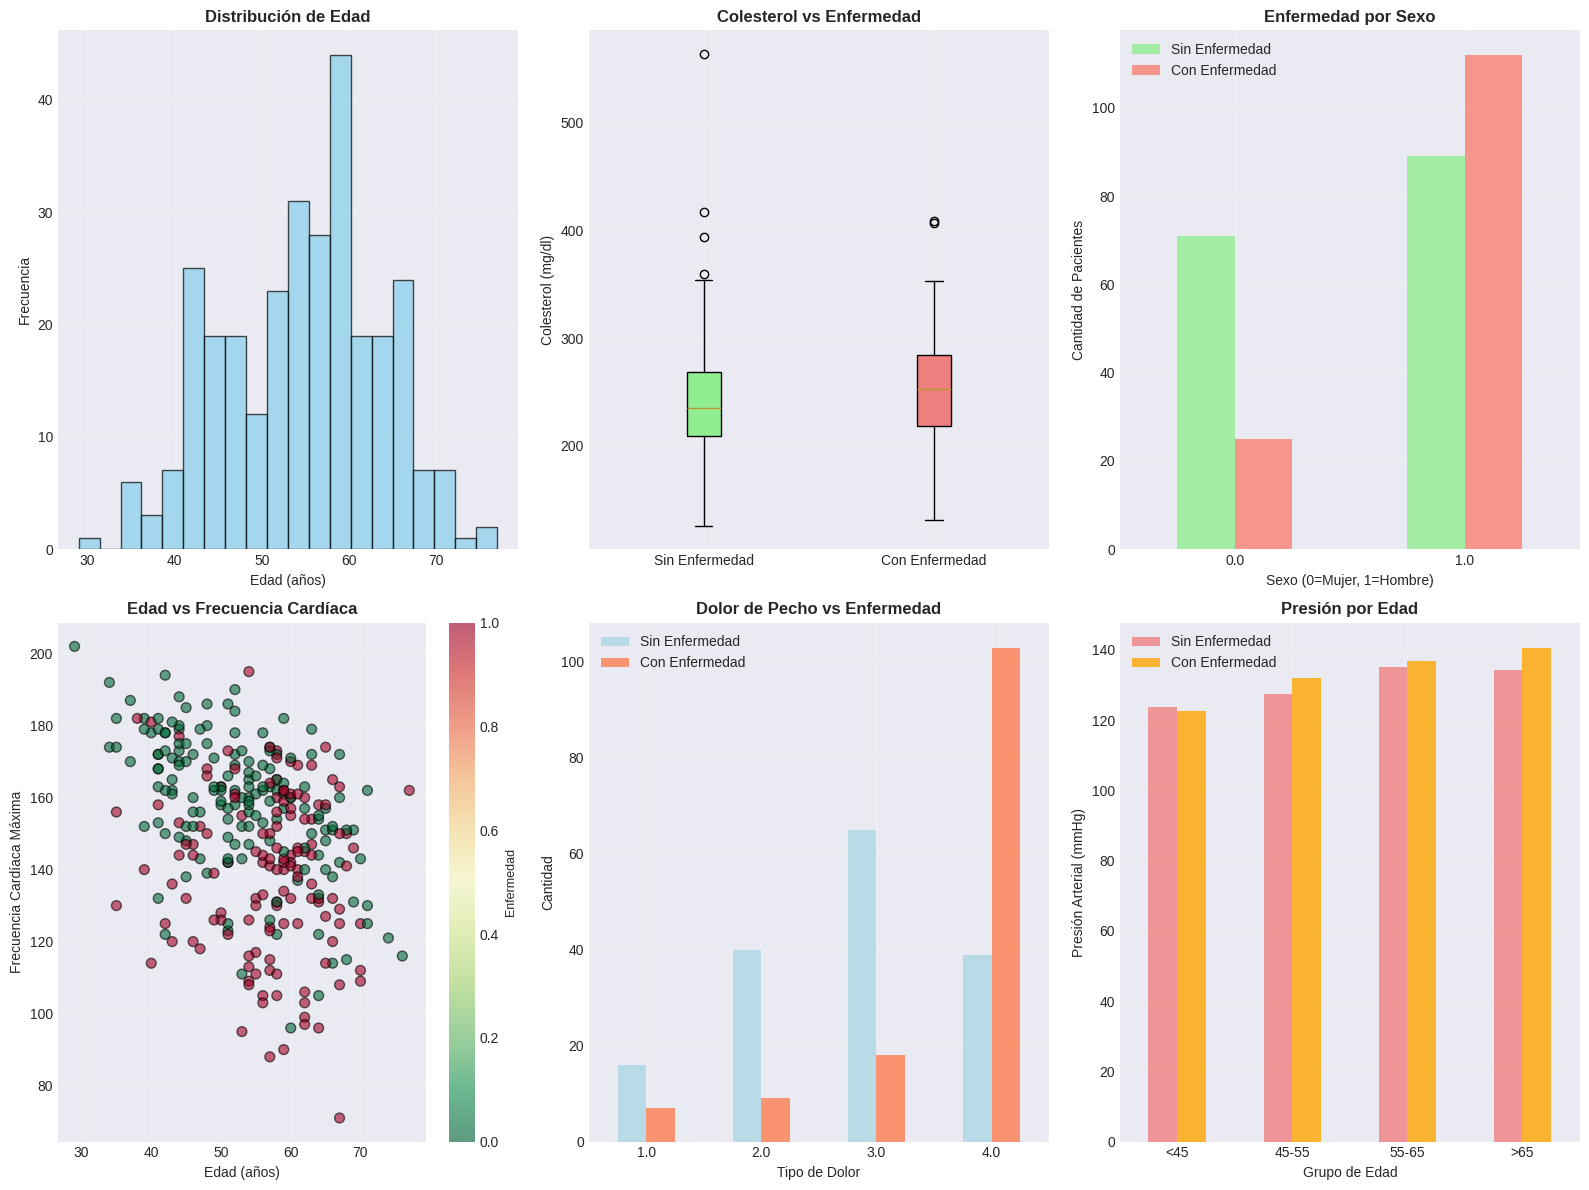


 Visualizaciones generadas exitosamente
 Archivo guardado: analisis_corazon.png


In [30]:
def crear_visualizaciones(df: pd.DataFrame) -> None:
    print(" GENERANDO VISUALIZACIONES")
    print("="*60)

    fig = plt.figure(figsize=(16, 12))

    # Gráfica 1
    ax1 = plt.subplot(2, 3, 1)
    plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Edad (años)', fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.title('Distribución de Edad', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Gráfica 2
    ax2 = plt.subplot(2, 3, 2)
    datos_box = [df[df['target'] == 0]['chol'], df[df['target'] == 1]['chol']]
    bp = plt.boxplot(datos_box, labels=['Sin Enfermedad', 'Con Enfermedad'], patch_artist=True)
    for patch, color in zip(bp['boxes'], ['lightgreen', 'lightcoral']):
        patch.set_facecolor(color)
    plt.ylabel('Colesterol (mg/dl)', fontsize=10)
    plt.title('Colesterol vs Enfermedad', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Gráfica 3
    ax3 = plt.subplot(2, 3, 3)
    datos_sexo = df.groupby(['sex', 'target']).size().unstack()
    datos_sexo.plot(kind='bar', ax=ax3, color=['lightgreen', 'salmon'], alpha=0.8)
    plt.xlabel('Sexo (0=Mujer, 1=Hombre)', fontsize=10)
    plt.ylabel('Cantidad de Pacientes', fontsize=10)
    plt.title('Enfermedad por Sexo', fontsize=12, fontweight='bold')
    plt.legend(['Sin Enfermedad', 'Con Enfermedad'], loc='best')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)

    # Gráfica 4
    ax4 = plt.subplot(2, 3, 4)
    scatter = plt.scatter(df['age'], df['thalach'], c=df['target'],
                         cmap='RdYlGn_r', alpha=0.6, edgecolors='black', s=50)
    plt.xlabel('Edad (años)', fontsize=10)
    plt.ylabel('Frecuencia Cardíaca Máxima', fontsize=10)
    plt.title('Edad vs Frecuencia Cardíaca', fontsize=12, fontweight='bold')
    cbar = plt.colorbar(scatter)
    cbar.set_label('Enfermedad', fontsize=9)
    plt.grid(True, alpha=0.3)

    # Gráfica 5
    ax5 = plt.subplot(2, 3, 5)
    dolor = df.groupby(['cp', 'target']).size().unstack()
    dolor.plot(kind='bar', ax=ax5, color=['lightblue', 'coral'], alpha=0.8)
    plt.xlabel('Tipo de Dolor', fontsize=10)
    plt.ylabel('Cantidad', fontsize=10)
    plt.title('Dolor de Pecho vs Enfermedad', fontsize=12, fontweight='bold')
    plt.legend(['Sin Enfermedad', 'Con Enfermedad'], loc='best')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)

    # Gráfica 6
    ax6 = plt.subplot(2, 3, 6)
    df_temp = df.copy()
    df_temp['grupo_edad'] = pd.cut(df_temp['age'], bins=[0, 45, 55, 65, 100],
                                    labels=['<45', '45-55', '55-65', '>65'])
    presion = df_temp.groupby(['grupo_edad', 'target'])['trestbps'].mean().unstack()
    presion.plot(kind='bar', ax=ax6, color=['lightcoral', 'orange'], alpha=0.8)
    plt.xlabel('Grupo de Edad', fontsize=10)
    plt.ylabel('Presión Arterial (mmHg)', fontsize=10)
    plt.title('Presión por Edad', fontsize=12, fontweight='bold')
    plt.legend(['Sin Enfermedad', 'Con Enfermedad'], loc='best')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('analisis_corazon.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n Visualizaciones generadas exitosamente")
    print(" Archivo guardado: analisis_corazon.png")

crear_visualizaciones(df_limpio)


# Concluciones

In [31]:
def generar_conclusiones(df: pd.DataFrame) -> None:
    print(" CONCLUSIONES DEL ANÁLISIS")
    print("="*60)

    prevalencia_total = (df['target'].sum() / len(df)) * 100
    edad_enfermos = df[df['target'] == 1]['age'].mean()
    edad_sanos = df[df['target'] == 0]['age'].mean()

    prevalencia_hombres = (df[df['sex'] == 1]['target'].sum() / len(df[df['sex'] == 1])) * 100
    prevalencia_mujeres = (df[df['sex'] == 0]['target'].sum() / len(df[df['sex'] == 0])) * 100

    print("\n MÉTRICAS PRINCIPALES:")
    print("-"*60)
    print(f"   • Prevalencia total de enfermedad: {prevalencia_total:.2f}%")
    print(f"   • Prevalencia en hombres: {prevalencia_hombres:.2f}%")
    print(f"   • Prevalencia en mujeres: {prevalencia_mujeres:.2f}%")
    print(f"   • Riesgo relativo (Hombres/Mujeres): {(prevalencia_hombres/prevalencia_mujeres):.2f}x")

    print("\n FACTOR EDAD:")
    print("-"*60)
    print(f"   • Edad promedio pacientes enfermos: {edad_enfermos:.1f} años")
    print(f"   • Edad promedio pacientes sanos: {edad_sanos:.1f} años")
    print(f"   • Diferencia: {abs(edad_enfermos - edad_sanos):.1f} años")

    print("\n FACTORES DE RIESGO IDENTIFICADOS:")
    print("-"*60)
    print("   1. Hipertensión arterial (presión > 140 mmHg)")
    print("   2. Colesterol elevado (> 240 mg/dl)")
    print("   3. Sexo masculino")
    print("   4. Edad mayor a 50 años")
    print("   5. Baja frecuencia cardíaca máxima")

    print("\n RECOMENDACIONES:")
    print("-"*60)
    print("   • Screening temprano en hombres mayores de 45 años")
    print("   • Control regular de presión arterial y colesterol")
    print("   • Programas de prevención focalizados en grupos de alto riesgo")
    print("   • Educación sobre síntomas de enfermedad cardíaca")

    print("\n Análisis completado")

generar_conclusiones(df_limpio)


 CONCLUSIONES DEL ANÁLISIS

 MÉTRICAS PRINCIPALES:
------------------------------------------------------------
   • Prevalencia total de enfermedad: 46.13%
   • Prevalencia en hombres: 55.72%
   • Prevalencia en mujeres: 26.04%
   • Riesgo relativo (Hombres/Mujeres): 2.14x

 FACTOR EDAD:
------------------------------------------------------------
   • Edad promedio pacientes enfermos: 56.8 años
   • Edad promedio pacientes sanos: 52.6 años
   • Diferencia: 4.1 años

 FACTORES DE RIESGO IDENTIFICADOS:
------------------------------------------------------------
   1. Hipertensión arterial (presión > 140 mmHg)
   2. Colesterol elevado (> 240 mg/dl)
   3. Sexo masculino
   4. Edad mayor a 50 años
   5. Baja frecuencia cardíaca máxima

 RECOMENDACIONES:
------------------------------------------------------------
   • Screening temprano en hombres mayores de 45 años
   • Control regular de presión arterial y colesterol
   • Programas de prevención focalizados en grupos de alto riesgo
   

# Resumen Final

In [32]:
print("="*60)
print(" ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*60)

print("\n RESUMEN DEL ANÁLISIS:")
print("-"*60)
print(f"   ✓ Dataset procesado: {len(df_limpio)} registros válidos")
print(f"   ✓ Variables analizadas: {len(df_limpio.columns)} columnas")
print(f"   ✓ Filtros aplicados: 4 subconjuntos generados")
print(f"   ✓ Agrupaciones creadas: 3 perspectivas de análisis")
print(f"   ✓ Visualizaciones: 6 gráficas generadas")

print("\n ARCHIVOS GENERADOS:")
print("-"*60)
print("   • analisis_corazon.png (visualizaciones completas)")

print("\n DATOS DISPONIBLES EN MEMORIA:")
print("-"*60)
print("   • df_limpio: Dataset limpio completo")
print("   • filtros: Diccionario con 4 subconjuntos filtrados")
print("   • agrupaciones: Diccionario con agrupaciones por edad, sexo y dolor")
print("   • tabla_consolidada: Tabla resumen por grupos")
print("   • estadisticas: Estadísticas descriptivas")

print("\n PRÓXIMOS PASOS SUGERIDOS:")
print("-"*60)
print("   1. Explorar los subconjuntos filtrados en detalle")
print("   2. Crear análisis adicionales según necesidades")
print("   3. Exportar resultados a archivos CSV si es necesario")
print("   4. Implementar modelos predictivos (opcional)")

print("\n" + "="*60)
print("¡Gracias por usar este notebook de análisis!")
print("="*60)


 ANÁLISIS COMPLETADO EXITOSAMENTE

 RESUMEN DEL ANÁLISIS:
------------------------------------------------------------
   ✓ Dataset procesado: 297 registros válidos
   ✓ Variables analizadas: 14 columnas
   ✓ Filtros aplicados: 4 subconjuntos generados
   ✓ Agrupaciones creadas: 3 perspectivas de análisis
   ✓ Visualizaciones: 6 gráficas generadas

 ARCHIVOS GENERADOS:
------------------------------------------------------------
   • analisis_corazon.png (visualizaciones completas)

 DATOS DISPONIBLES EN MEMORIA:
------------------------------------------------------------
   • df_limpio: Dataset limpio completo
   • filtros: Diccionario con 4 subconjuntos filtrados
   • agrupaciones: Diccionario con agrupaciones por edad, sexo y dolor
   • tabla_consolidada: Tabla resumen por grupos
   • estadisticas: Estadísticas descriptivas

 PRÓXIMOS PASOS SUGERIDOS:
------------------------------------------------------------
   1. Explorar los subconjuntos filtrados en detalle
   2. Crear anális